### 1. IMPORTING PACKAGES

In [ ]:
#!pip install pandas 
#!pip install nltk 
#!pip install textblob
#%matplotlib inline
#!pip install matplotlib 
#!pip install wordcloud 
#!pip install seaborn

In [ ]:
# Data Processing
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob

# Others
import warnings
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. DATASET

In [ ]:
# Tweets about TSLA from 1/1/2018 to 1/12/2020
tweets_df = pd.read_csv('./tesla_2018_to_2020.csv').drop(['Unnamed: 0'], axis=1)
tweets_df = tweets_df[['created_at', 'id_str', 'full_text']]
tweets_df.head()

,created_at,id_str,full_text
0,2020-06-01T22:59:51+00:00,1267591722126598144,I just got hired at Tesla! God is good.
1,2020-06-01T22:59:49+00:00,1267591711905026048,tesla [mergrim mix] (Remastered 2020) - Spangle call Lilli line - SCLL [Disc 1] #nowplaying https://t.co/Fsw8lziIDI
2,2020-06-01T22:58:40+00:00,1267591424628973574,Tesla - Little Suzi https://t.co/9Lj4jvF8KR via @YouTube
3,2020-06-01T22:58:21+00:00,1267591344299683841,"New post: ""Why Has Tesla Halved The Model Y Delivery Timeline?"" https://t.co/6tuA2dVcLf"
4,2020-06-01T22:57:35+00:00,1267591151487418372,Meaning if you had a million units of Tesla you just made a cool 63M bucks today alone. \n\nMy prediction is that Tesla will hit $1000 before end of June 🤞🏽


In [ ]:
# Convert 'created_at' to datetime
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at']).dt.date

### 3. CLEANING TWEETS

In [ ]:
def clean(df):
    # Adding whitespace to end of every tweet
    df['cleaned_tweet'] = df.full_text.map(lambda x: x + ' ')
    
    # Removing http links
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'http.*', '', x))
    
    # Removing special characters and numbers
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'[^a-zA-Z#]', ' ', x))
    
    # Lowercast
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.lower())
    
    # Tokenizing tweets and removing stop words
    stopword_list = stopwords.words('english')
    
    for i in range(len(df.cleaned_tweet)):
        tokens = word_tokenize(df.cleaned_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        df.cleaned_tweet[i] = clean_tokens

In [54]:
clean(tweets_df)
tweets_df.head()

,created_at,id_str,full_text,cleaned_tweet
0,2020-06-01,1267591722126598144,I just got hired at Tesla! God is good.,"[got, hired, tesla, god, good]"
1,2020-06-01,1267591711905026048,tesla [mergrim mix] (Remastered 2020) - Spangle call Lilli line - SCLL [Disc 1] #nowplaying https://t.co/Fsw8lziIDI,"[tesla, mergrim, mix, remastered, spangle, call, lilli, line, scll, disc, #, nowplaying]"
2,2020-06-01,1267591424628973574,Tesla - Little Suzi https://t.co/9Lj4jvF8KR via @YouTube,"[tesla, little, suzi]"
3,2020-06-01,1267591344299683841,"New post: ""Why Has Tesla Halved The Model Y Delivery Timeline?"" https://t.co/6tuA2dVcLf","[new, post, tesla, halved, model, delivery, timeline]"
4,2020-06-01,1267591151487418372,Meaning if you had a million units of Tesla you just made a cool 63M bucks today alone. \n\nMy prediction is that Tesla will hit $1000 before end of June 🤞🏽,"[meaning, million, units, tesla, made, cool, bucks, today, alone, prediction, tesla, hit, end, june]"


In [55]:
tweets_df.full_text[0]

'I just got hired at Tesla! God is good.'

In [56]:
tweets_df.cleaned_tweet[0]

['got', 'hired', 'tesla', 'god', 'good']

### 4. LEMMATIZING

In [ ]:
# Lemmatization: grouping together inflected forms of word
def lemmatize(tweets):
    for i in range(len(tweets)):
        
        # Pos-tagging each word in tweet
        for w in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(w)
        
        # Converting pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
                
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [59]:
lemmatize(tweets_df.cleaned_tweet)
tweets_df.head()

,created_at,id_str,full_text,cleaned_tweet
0,2020-06-01,1267591722126598144,I just got hired at Tesla! God is good.,get hire tesla god good
1,2020-06-01,1267591711905026048,tesla [mergrim mix] (Remastered 2020) - Spangle call Lilli line - SCLL [Disc 1] #nowplaying https://t.co/Fsw8lziIDI,tesla mergrim mix remastered spangle call lilli line scll disc # nowplaying
2,2020-06-01,1267591424628973574,Tesla - Little Suzi https://t.co/9Lj4jvF8KR via @YouTube,tesla little suzi
3,2020-06-01,1267591344299683841,"New post: ""Why Has Tesla Halved The Model Y Delivery Timeline?"" https://t.co/6tuA2dVcLf",new post tesla halve model delivery timeline
4,2020-06-01,1267591151487418372,Meaning if you had a million units of Tesla you just made a cool 63M bucks today alone. \n\nMy prediction is that Tesla will hit $1000 before end of June 🤞🏽,mean million unit tesla make cool buck today alone prediction tesla hit end june


In [ ]:
# Removing common words
# In this case, we will remove 'tesla', 'tsla', 'q', '#', 'musk', 'elon', 'elonmusk'
def final_clean(df):
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tesla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tsla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('q', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('#', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('musk', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('elon', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('elonmusk', ''))
final_clean(tweets_df)

In [61]:
tweets_df.cleaned_tweet[0]

'get hire  god good'

In [ ]:
# Joining all tweets into one string
all_words_str = ' '.join([tweet for tweet in tweets_df.cleaned_tweet])

# Making list of all words
all_words_list = all_words_str.split()

### 5. FREQUENCIES ANALYSIS

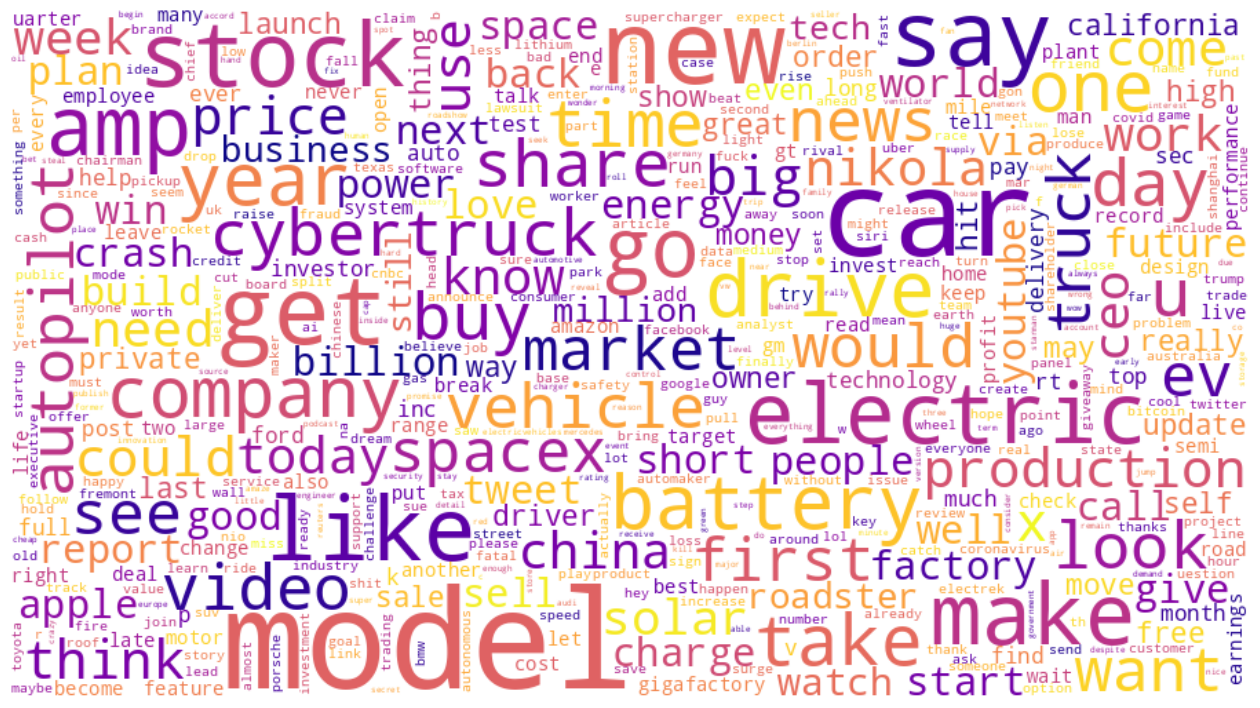

In [ ]:
word_freq = nltk.FreqDist(all_words_list)

# Word cloud
word_cloud = WordCloud(
    width=900,
    height=500,
    max_words=500,
    max_font_size=100,
    relative_scaling=0.5,
    colormap='plasma',
    background_color='white',
    normalize_plurals=True
).generate_from_frequencies(word_freq)

# Show WordCloud
plt.figure(figsize=(16, 9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Showing frequency of each word
word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
word_freq_df.head(10)

,Word,Count
19,model,475129
237,car,358840
16,new,246736
0,get,216511
156,say,198363
34,stock,191490
188,like,183211
25,make,170079
72,electric,165606
349,amp,156876


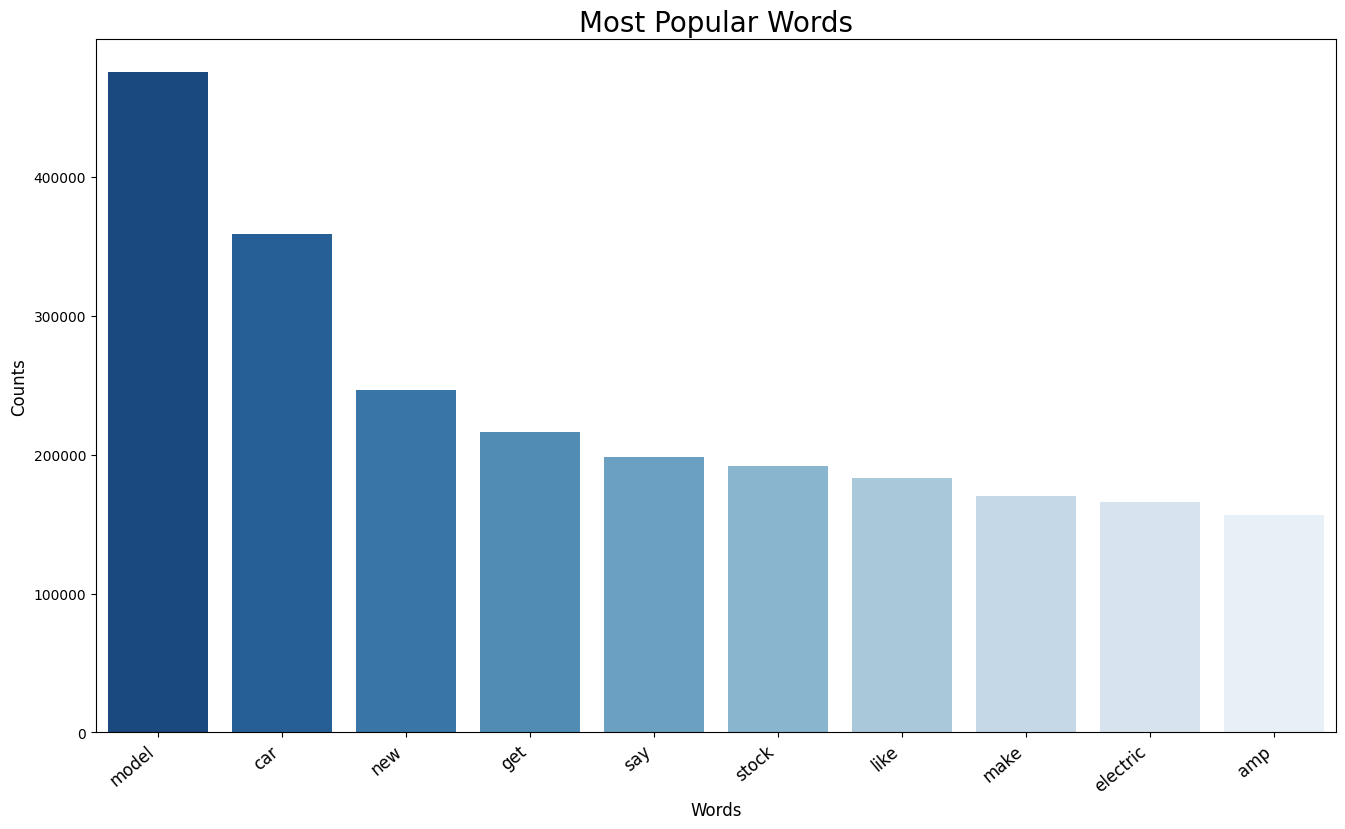

In [ ]:
word_freq_df = word_freq_df.nlargest(columns='Count', n=10)

# Plotting bar plot of most frequent words
plt.figure(figsize=(16, 9))
colors = sns.color_palette("Blues", len(word_freq_df)) [::-1]
ax = sns.barplot(data=word_freq_df, x='Word', y='Count', palette=colors)
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Most Popular Words', fontsize=20)
plt.show()

### 6. SAVE CLEANED TWEETS

In [66]:
tweets_df.to_csv('cleaned_tesla_2018_to_2020.csv', index=False)

### 7. NEW DATASET

In [67]:
tweets_df = pd.read_csv('cleaned_tesla_2018_to_2020.csv', lineterminator='\n')
tweets_df = tweets_df.iloc[:, [1, 0, 3]]
tweets_df.head()

,id_str,created_at,cleaned_tweet
0,1267591722126598144,2020-06-01,get hire god good
1,1267591711905026048,2020-06-01,mergrim mix remastered spangle call lilli line scll disc nowplaying
2,1267591424628973574,2020-06-01,little suzi
3,1267591344299683841,2020-06-01,new post halve model delivery timeline
4,1267591151487418372,2020-06-01,mean million unit make cool buck today alone prediction hit end june


In [ ]:
# Convert 'created_at' to datetime
tweets_df.created_at = pd.to_datetime(tweets_df.created_at)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273947 entries, 0 to 3273946
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id_str         int64         
 1   created_at     datetime64[ns]
 2   cleaned_tweet  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 74.9+ MB


In [ ]:
# Check for missing values
tweets_df.isnull().sum()

,0
id_str,0
created_at,0
cleaned_tweet,15953


In [70]:
# dropping null values
tweets_df = tweets_df.dropna()

### 8. CALCULATING SENTIMENT SCORES

In [ ]:
# Using TextBlob
tweets_df['sentiment_score'] = tweets_df.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets_df.head()

,id_str,created_at,cleaned_tweet,sentiment_score
0,1267591722126598144,2020-06-01,get hire god good,0.700000
1,1267591711905026048,2020-06-01,mergrim mix remastered spangle call lilli line scll disc nowplaying,0.000000
2,1267591424628973574,2020-06-01,little suzi,-0.187500
3,1267591344299683841,2020-06-01,new post halve model delivery timeline,0.136364
4,1267591151487418372,2020-06-01,mean million unit make cool buck today alone prediction hit end june,0.018750


In [ ]:
# Previweing Sentiment Scores
pd.options.display.max_colwidth = 300
random_subset = tweets_df.sample(n=10)
random_subset = random_subset.drop(columns=['id_str', 'created_at'])
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet',
                                              'cleaned_tweet': 'Cleaned Tweet',
                                              'sentiment_score':'Sentiment Score'})
random_subset.head(10)

,Cleaned Tweet,Sentiment Score
1812631,crash car autopilot mode say sped accident,0.000000
3110304,tiffany haddish tear talk tyler perry buy watch exclusive,0.000000
124555,company boycott anything own murdoch b dyson could afford one c could afford one sport direct e wetherspoons f new balance g uber,0.278788
401996,may soon end old auto industry know maybe future see vw ford car museums museum dinosaur vw ford toyota hyundai car ev vikez history investor,0.050000
1847453,new sec document inc stock news alert app,0.018182
1177900,agree ny even give,0.000000
186794,porsche r amp bos speaks battery macan ev hydrogen fail ecar,-0.500000
2236310,stand reap solar tariff reward rival suffer mercury news,0.000000
2112009,smetal np call want listen,0.000000
2536081,apply matte black emblem abstract ocean brother black model love shadow look catch light right make look like reflect somewhere chose put reason work inventory,0.170476


### 9. FREQUENCIES ANALYSIS

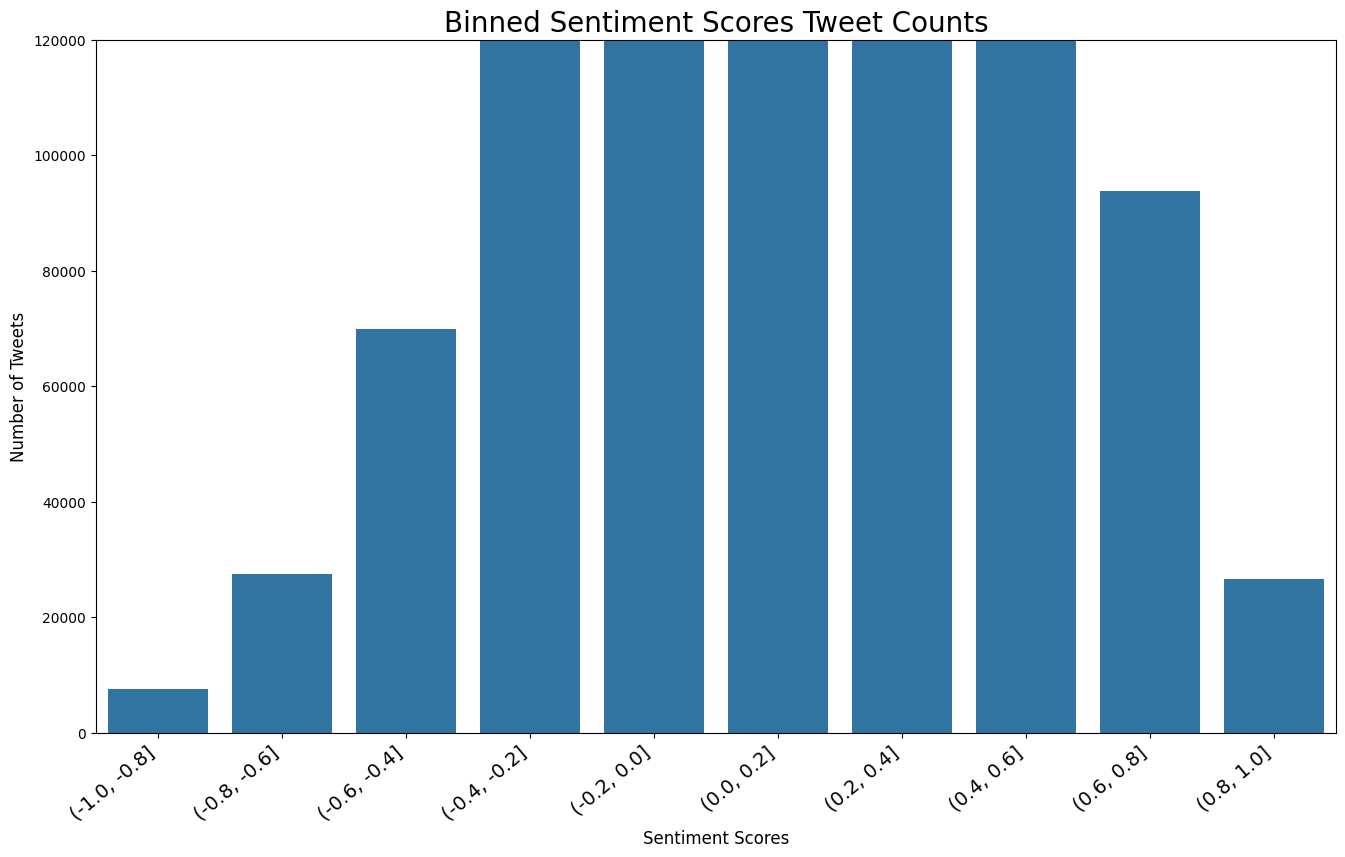

In [73]:
# plotting counts of tweets for binned sentiment scores
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)
plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('Sentiment Scores', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)
ax.set_title('Binned Sentiment Scores Tweet Counts', fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

### 10. CALCULATING DAILY AVG SENTIMENT SCORES

In [74]:
daily_sentiment_scores_df = tweets_df[['created_at', 'sentiment_score']]
daily_sentiment_scores_df.head()

,created_at,sentiment_score
0,2020-06-01,0.700000
1,2020-06-01,0.000000
2,2020-06-01,-0.187500
3,2020-06-01,0.136364
4,2020-06-01,0.018750


In [75]:
# daily average sentiment scores
daily_sentiment_scores_df = daily_sentiment_scores_df.resample('D', on='created_at').mean()
daily_sentiment_scores_df.head()

,sentiment_score
created_at,
2018-01-01,0.136628
2018-01-02,0.120915
2018-01-03,0.077681
2018-01-04,0.036801
2018-01-05,0.084769


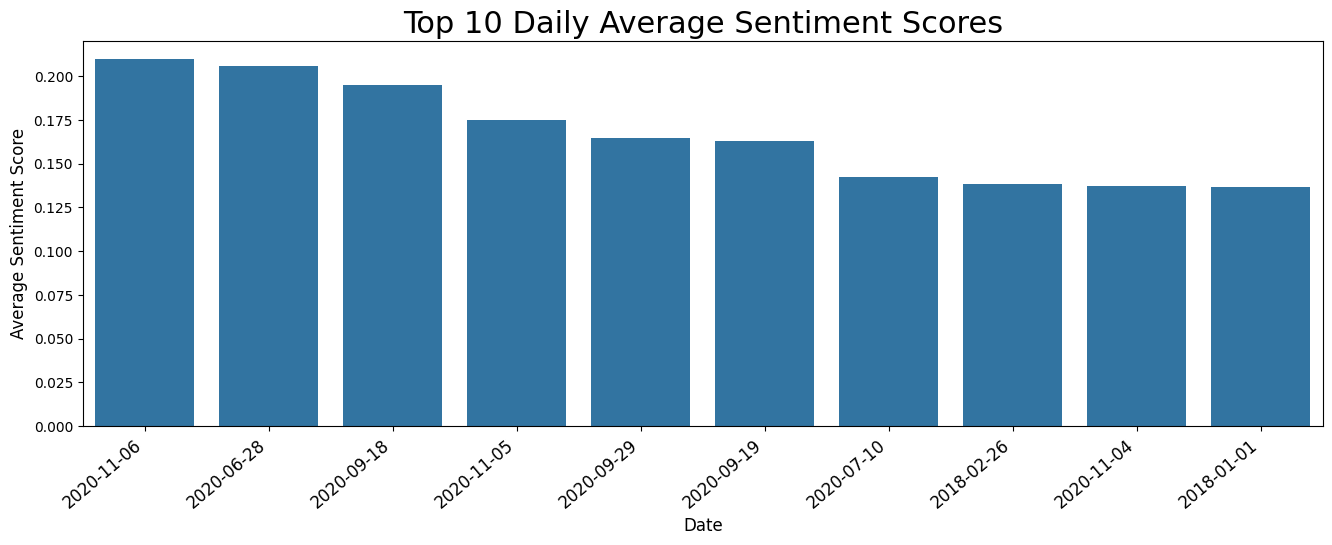

In [76]:
# plotting top 10 daily average sentiment scores
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Top 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

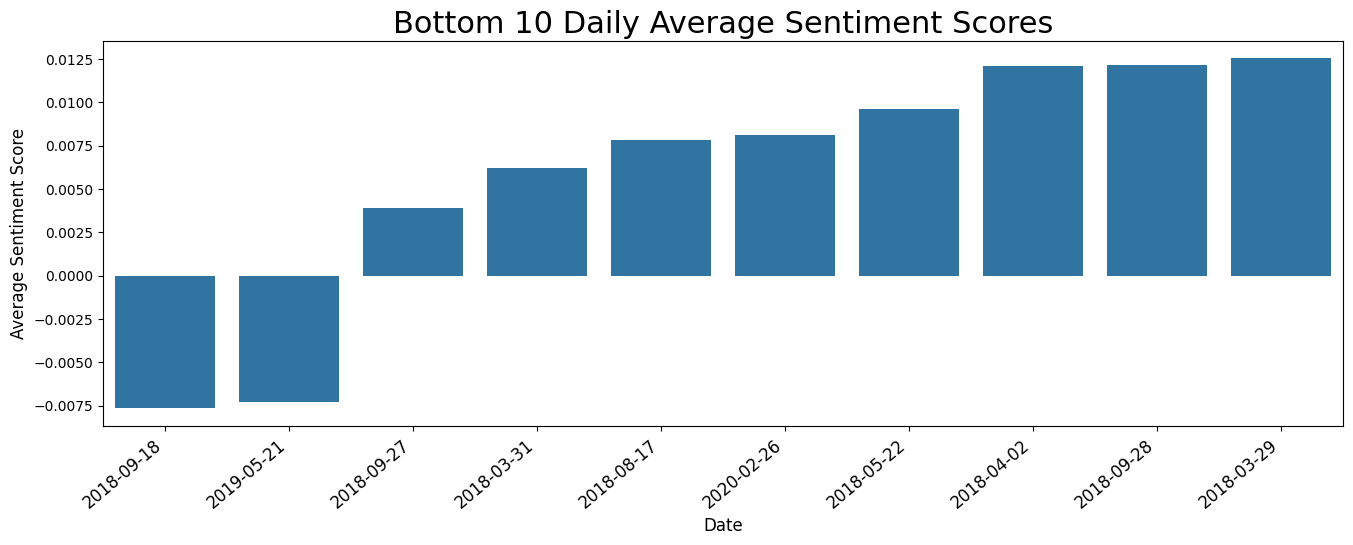

In [77]:
# plotting bottom 10 daily average sentiment scores
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Bottom 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

### 11. REMOVING ZERO SENTIMENT SCORES

In [78]:
tweets_df1 = tweets_df.copy()
tweets_df1.head()

,id_str,created_at,cleaned_tweet,sentiment_score,bin
0,1267591722126598144,2020-06-01,get hire god good,0.700000,"(0.6, 0.8]"
1,1267591711905026048,2020-06-01,mergrim mix remastered spangle call lilli line scll disc nowplaying,0.000000,"(-0.2, 0.0]"
2,1267591424628973574,2020-06-01,little suzi,-0.187500,"(-0.2, 0.0]"
3,1267591344299683841,2020-06-01,new post halve model delivery timeline,0.136364,"(0.0, 0.2]"
4,1267591151487418372,2020-06-01,mean million unit make cool buck today alone prediction hit end june,0.018750,"(0.0, 0.2]"


In [79]:
tweets_df1.created_at = pd.to_datetime(tweets_df1.created_at)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3257994 entries, 0 to 3273946
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id_str           int64         
 1   created_at       datetime64[ns]
 2   cleaned_tweet    object        
 3   sentiment_score  float64       
 4   bin              category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 127.4+ MB


In [80]:
# checking tweets with zero sentiment scores
(tweets_df1.sentiment_score == 0).sum()

1538417

In [81]:
# removing tweets with zero sentiment scores
tweets_df1 = tweets_df1[tweets_df1.sentiment_score !=0 ]
(tweets_df1.sentiment_score == 0).sum()

0

In [82]:
# daily average sentiment scores without zero sentiment scores
numeric_columns = tweets_df1.select_dtypes(include=['number']).columns

tweets_df1 = tweets_df1.groupby('created_at', as_index=False)[numeric_columns].mean()

In [83]:
# checking for null values
tweets_df1.isnull().sum()

,0
created_at,0
id_str,0
sentiment_score,0


In [85]:
# adding final average sentiment scores
daily_sentiment_scores_df = daily_sentiment_scores_df.merge(
    tweets_df1[['created_at', 'sentiment_score']],
    on='created_at',
    how='left'
).rename(columns={'sentiment_score': 'sentiment_score_final'})
daily_sentiment_scores_df.head()

,created_at,sentiment_score_x,sentiment_score_y
0,2018-01-01,0.136628,0.242089
1,2018-01-02,0.120915,0.220641
2,2018-01-03,0.077681,0.142855
3,2018-01-04,0.036801,0.072691
4,2018-01-05,0.084769,0.168529


In [86]:
daily_sentiment_scores_df.to_csv('daily-avg-sentiment-scores.csv')